# Lab | Cross Validation
For this lab, we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

### Instructions
1. Apply SMOTE for upsampling the data

- Use logistic regression to fit the model and compute the accuracy of the model.
- Use decision tree classifier to fit the model and compute the accuracy of the model.
- Compare the accuracies of the two models.

2. Apply TomekLinks for downsampling

- It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
- Use logistic regression to fit the model and compute the accuracy of the model.
- Use decision tree classifier to fit the model and compute the accuracy of the model.
- Compare the accuracies of the two models.
- You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

---

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("churn_data_cleaned.csv")
#df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,index,tenure,seniorcitizen,monthlycharges,totalcharges,churn
0,0,1,0,29.85,29.85,0.0
1,1,34,0,56.95,1889.50,0.0
2,2,2,0,53.85,108.15,1.0
3,3,45,0,42.30,1840.75,0.0
4,4,2,0,70.70,151.65,1.0


In [3]:
df.shape

(7032, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           7032 non-null   int64  
 1   tenure          7032 non-null   int64  
 2   seniorcitizen   7032 non-null   int64  
 3   monthlycharges  7032 non-null   float64
 4   totalcharges    7032 non-null   float64
 5   churn           7032 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 329.8 KB


# Imbalaned Data

0.0    5163
1.0    1869
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

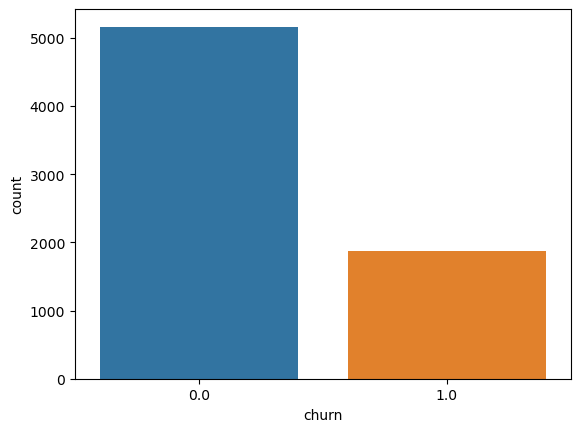

In [5]:
# Check target --> we have imbalanced data
print (df["churn"].value_counts())

sns.countplot(df["churn"])

- We see imbalanced data with: 
    - majority "No" class 73%
    - minority "Yes" class 27%

# Define Features

In [6]:
X = df.drop(["churn", "index"], axis=1)
X.head()

,tenure,seniorcitizen,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


In [7]:
#standardise the numerical data 
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized.head()

,tenure,seniorcitizen,monthlycharges,totalcharges
0,-1.280248,-0.440327,-1.161694,-0.994194
1,0.064303,-0.440327,-0.260878,-0.173740
2,-1.239504,-0.440327,-0.363923,-0.959649
3,0.512486,-0.440327,-0.747850,-0.195248
4,-1.239504,-0.440327,0.196178,-0.940457


# Baseline Model

In [8]:
# Define target
y = df[['churn']]
# y.head()

In [9]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.25, random_state=42)
# print(len(X_train))
# print(len(y_train))

Logistic Regression: 

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1300
         1.0       0.62      0.45      0.52       458

    accuracy                           0.78      1758
   macro avg       0.72      0.67      0.69      1758
weighted avg       0.77      0.78      0.77      1758



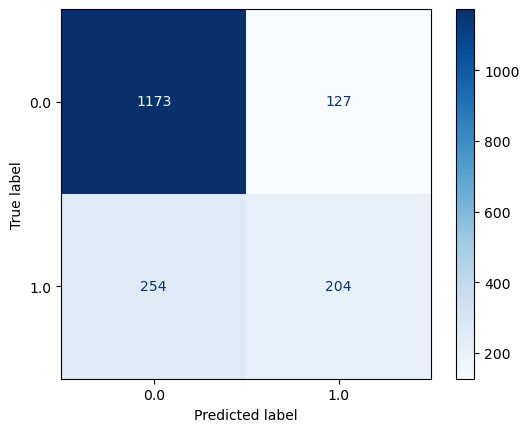


 Decision Tree: 

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1300
         1.0       0.46      0.46      0.46       458

    accuracy                           0.72      1758
   macro avg       0.63      0.63      0.63      1758
weighted avg       0.72      0.72      0.72      1758



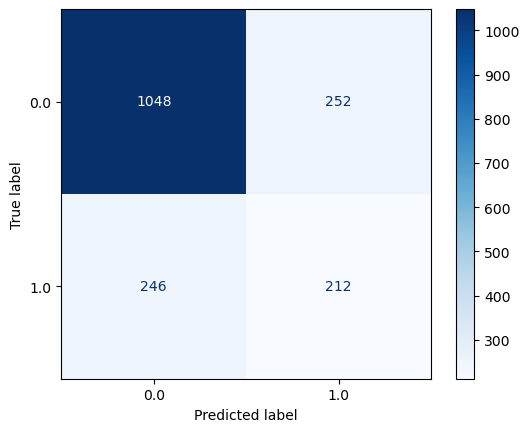

In [10]:
def fitting_model(model_x_condition, X_train, y_train):
    
    # setup and train the model
    model = model_x_condition.fit(X_train,y_train) 
    
    # predict the y_pred (predictions)
    predictions = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, predictions))

    # Visualze
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

# Calling the Logistic Regression baseline model
print("Logistic Regression:", "\n")
fitting_model(LogisticRegression(random_state=42, multi_class='ovr'), X_train, y_train)

# Calling the Decision Trees baseline model
print("\n", "Decision Tree:", "\n")
fitting_model(DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=None), X_train, y_train)

### Observation

- Logistic Regression seems to perform better than the Decision Trees with overall precision, recall, f-1 and accuraccy scores.

- Also, we see a huge gap of precision & recall scores between the 2 classes because of the imbalanced data. 

### What's next?
- We might be able to improve the model by using machine learning algorithms to manage the imbalanced- into (more) balanced data.
- In this lab, we will try two methods to manage the data:
    1. SMOTE
    2. TomekLinks
    

<div class="alert alert-block alert-info">
    <font color=black>
    <h2>Managing Imbalanced Data & Improving the Classification Model</h2>
    </font>
    </div>

# SMOTE (OverSampling)

- Oversampling data using by 
    - Picking a point from the minority class
    - Computing the k-nearest neighbors (for some pre-specified k) for this point
    - Adding k new points somewhere between the chosen point and each of its neighbors
    

Read more:
- [SMOTE explained for noobs – Synthetic Minority Over-sampling TEchnique line by line](https://rikunert.com/smote_explained)

## Logistic Regression  

Oversampling with SMOTE: 
 churn
0.0      3863
1.0      3863
dtype: int64 

Origin data: 
 churn
0.0      5163
1.0      1869
dtype: int64 

              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      1300
         1.0       0.48      0.73      0.58       458

    accuracy                           0.72      1758
   macro avg       0.68      0.72      0.68      1758
weighted avg       0.78      0.72      0.74      1758



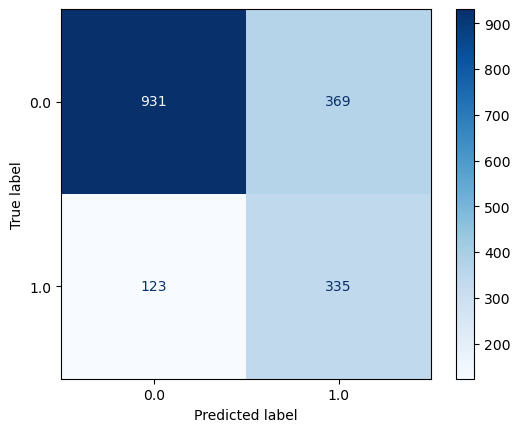

In [11]:
from imblearn.over_sampling import SMOTE
  
# Resampling with SMOTE
sm = SMOTE(random_state = 42)
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
print("Oversampling with SMOTE:", "\n", y_train_smt.value_counts(), "\n")
print("Origin data:", "\n", y.value_counts(), "\n")

# # Calling the Logistic Regression after SMOTE 
fitting_model(LogisticRegression(random_state=42, multi_class='ovr'), X_train_smt, y_train_smt)

## Decision Trees

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1300
         1.0       0.46      0.52      0.49       458

    accuracy                           0.72      1758
   macro avg       0.64      0.65      0.64      1758
weighted avg       0.73      0.72      0.72      1758



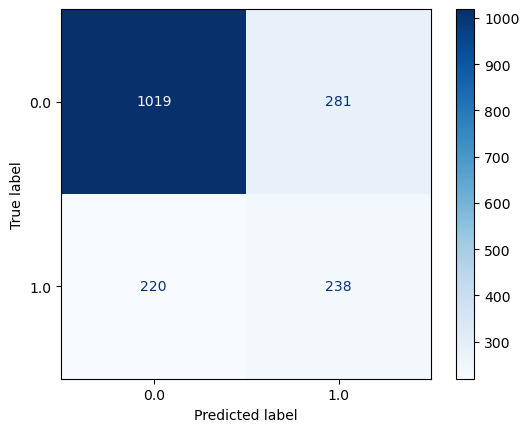

In [12]:
# Calling the Decicsion Trees after SMOTE 
fitting_model(DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=None), X_train_smt, y_train_smt)

### Evaluation Metrics

---

- **Logistic Regression**: 


    precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      1300
         1.0       0.48      0.73      0.58       458

    accuracy                           0.72      1758
    
    
---

    
- **Decision Trees**:


    precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1300
         1.0       0.46      0.52      0.49       458

    accuracy                           0.72      1758


    
## Result

- Overall, the Logistic Regression showed better scores in precision, recall, and accuracy after applying SMOTE.



# TomekLinks

Removing the instances of the majority class of each pair by comparing the close instances between two classes.  This method increases the space between the two classes, facilitating the classification process.

## Logistic Regression

Undersampling with TomekLinks: 
 churn
0.0      3484
1.0      1411
dtype: int64 

Origin data: 
 churn
0.0      5163
1.0      1869
dtype: int64 

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1300
         1.0       0.57      0.53      0.55       458

    accuracy                           0.77      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.77      0.77      0.77      1758



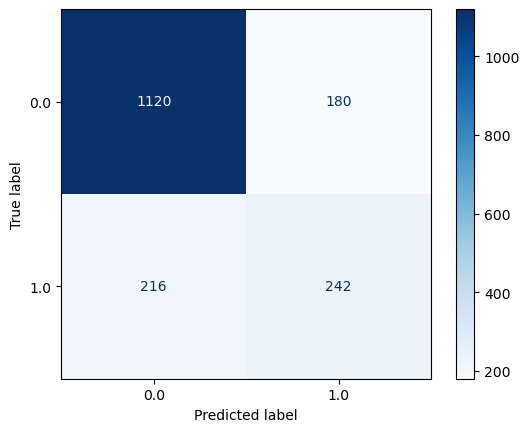

In [13]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X_train, y_train)

print("Undersampling with TomekLinks:", "\n", y_tl.value_counts(), "\n")
print("Origin data:", "\n", y.value_counts(), "\n")

# Calling the Logistic Regression after TomekLinks 
fitting_model(LogisticRegression(random_state=42, multi_class='ovr'), X_tl, y_tl)


## Decision Trees

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1300
         1.0       0.45      0.51      0.48       458

    accuracy                           0.71      1758
   macro avg       0.64      0.65      0.64      1758
weighted avg       0.73      0.71      0.72      1758



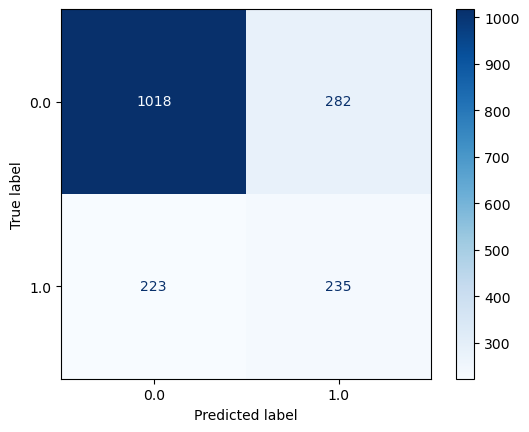

In [14]:
# Calling the decision trees model after TomekLinks

fitting_model(DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=None), X_tl, y_tl)

## Comparing the Models after TomekLinks Downsampling

### Evaluation Metrics

---

- **Logistic Regression**: 


    precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1300
         1.0       0.57      0.53      0.55       458

    accuracy                           0.77      1758
    
    
---

    
- **Decision Trees**:


    precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1300
         1.0       0.45      0.51      0.48       458

    accuracy                           0.71      1758


## Result

- Overall, the Logistic Regression showed better scores in precision, recall, and accuracy after applying TomekLinks.


## Summarize

- In both cases, after applying SMOTE and TomekLinks, we found that Logistic Regression model performed better for this dataset.


In [15]:
#### END OF THE LAB & THANK YOU!!! ❤️ ####